In [57]:
import pandas as pd
import csv
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


In [58]:
spam = pd.read_csv("spam.csv", encoding='iso-8859-1')

In [59]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [60]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [61]:
sp=spam.head()

In [62]:
sp.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [63]:
spam=spam.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [64]:
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [65]:
spd=spam.rename(columns={"v1":"Spam or not Spam","v2":"Message"})

In [66]:
spd.head()

,Spam or not Spam,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [67]:
spd['Length']=spd['Message'].apply(len)

In [68]:
spd.head()

,Spam or not Spam,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


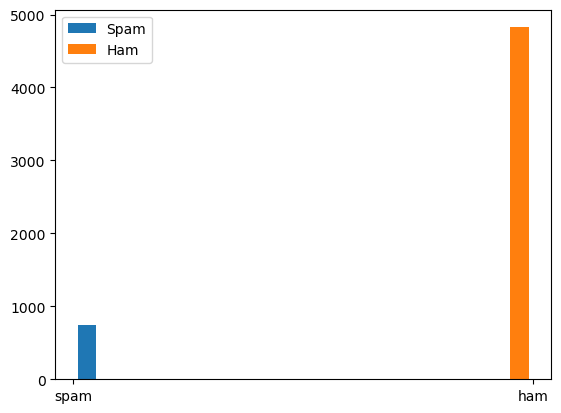

In [69]:
import matplotlib.pyplot as plt
spamyes = spd[spd['Spam or not Spam'] == 'spam']
spamno = spd[spd['Spam or not Spam'] == 'ham']
plt.hist([spamyes['Spam or not Spam'], spamno['Spam or not Spam']], label=['Spam', 'Ham'])
plt.legend()

In [70]:
spd['Spam or not Spam'].replace({'spam':1,'ham':0},inplace=True)

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [72]:
tfidf=TfidfVectorizer()
X=spd['Message']
X=tfidf.fit_transform(X)
Y=spd['Spam or not Spam']

In [73]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=1)

In [74]:
xtrain

<4457x8672 sparse matrix of type '<class 'numpy.float64'>'
	with 59357 stored elements in Compressed Sparse Row format>

In [75]:
print(xtrain.shape)
print(xtest.shape)

(4457, 8672)
(1115, 8672)


In [76]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [77]:
nbs=MultinomialNB()
nbs=nbs.fit(xtrain,ytrain)
nbypred = nbs.predict(xtest)

accuracy = accuracy_score(ytest, nbypred)
print("     MultinomialNB")
print("Accuracy score is: {}%".format(round(accuracy*100,2)))


     MultinomialNB
Accuracy score is: 96.95%


In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
lrc=LogisticRegression()
lrc.fit(xtrain,ytrain)
ypred=lrc.predict(xtest)
accuracy = accuracy_score(ytest,ypred)
print("     Logistic Regression")
print("Accuracy score is: {}%".format(round(accuracy*100,2)))

     Logistic Regression
Accuracy score is: 97.49%


In [80]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [81]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=1)

In [82]:
s = svm.SVC(kernel='linear')

In [83]:
s=s.fit(xtrain,ytrain)

In [84]:
ypred=s.predict(xtest)

In [85]:
accuracy = accuracy_score(ytest,ypred)
print("     SVM")
print("Accuracy score is: {}%".format(round(accuracy*100,2)))

     SVM
Accuracy score is: 99.01%


In [86]:
from sklearn.metrics import classification_report

report = classification_report(ytest, ypred)
print(report)


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       976
           1       0.98      0.94      0.96       139

    accuracy                           0.99      1115
   macro avg       0.99      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [87]:
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [88]:
def clean_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalnum()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text


In [89]:
email="Oh k...i'm watching here:)"

In [90]:
transformed_email = clean_text(email)
emailvec=tfidf.transform([email])

In [91]:
sample_predict = nbs.predict(emailvec)
if sample_predict[0]==1:
    print("The message is spam")
else:
        print("The message is not spam")



The message is not spam
